In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

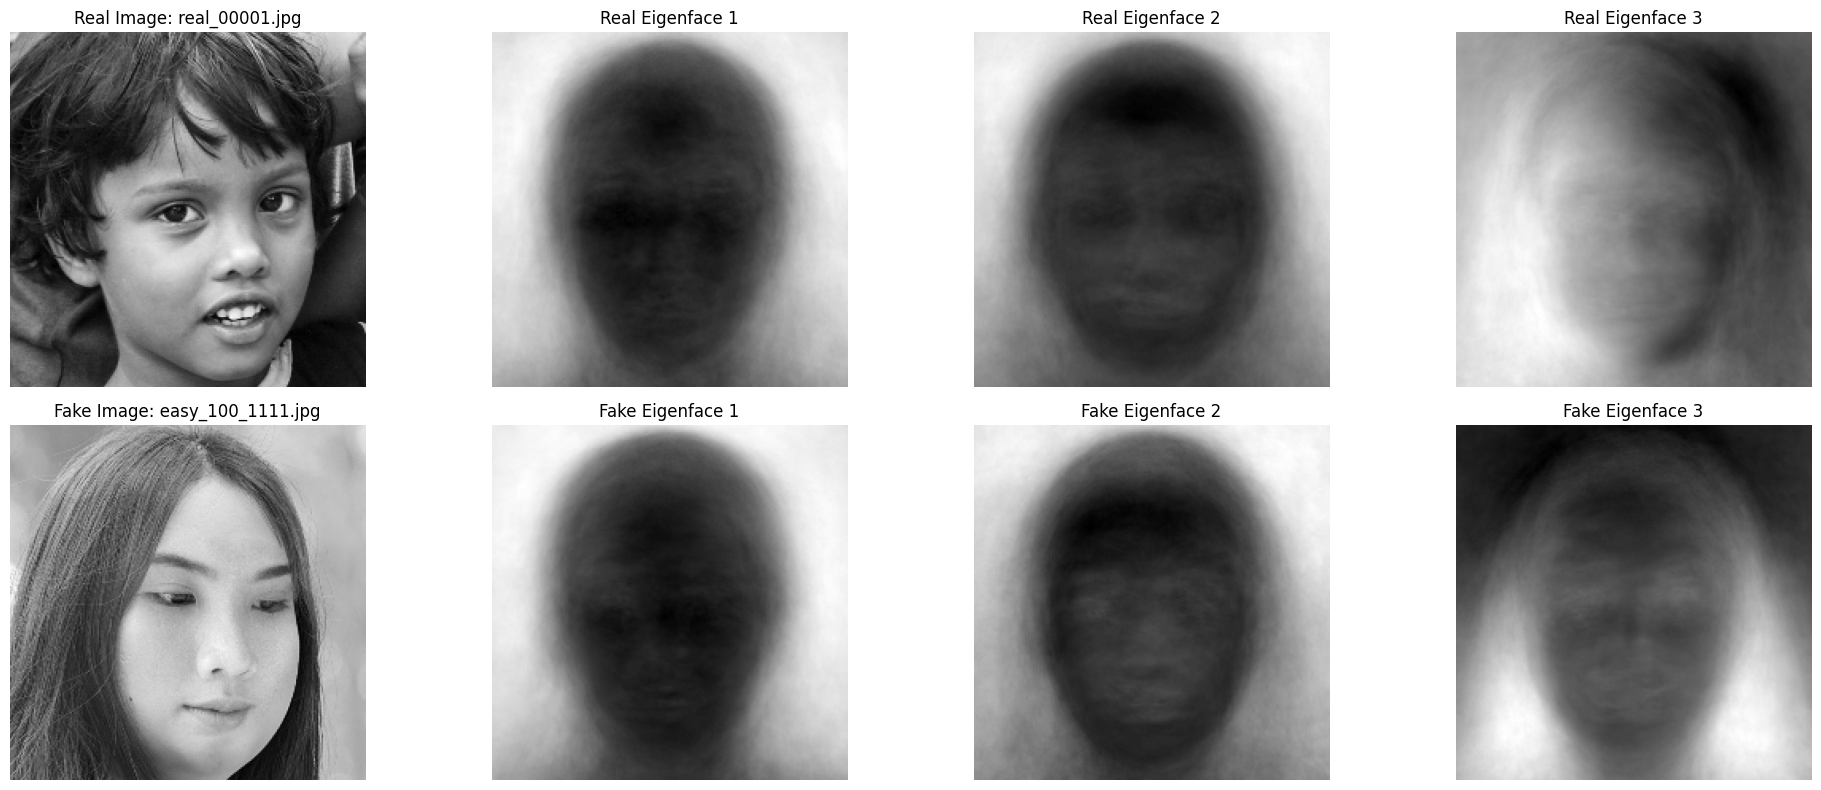

In [14]:
def load_images_from_directory(directory):
    images = []
    original_images = []
    filenames = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
        if img is not None:
            img_resized = cv2.resize(img, (224, 224))  
            images.append(img_resized.flatten()) 
            original_images.append(img_resized)  
            filenames.append(filename) 
    return np.array(images), original_images, filenames

# Load images from both directories
fake_directory = 'D:/Face_fake_detection/Data_files/full_ds/fake'  
real_directory = 'D:/Face_fake_detection/Data_files/full_ds/real'  

X_fake, original_fake_images, fake_filenames = load_images_from_directory(fake_directory)
X_real, original_real_images, real_filenames = load_images_from_directory(real_directory)


n_components = 3

# PCA for real images
pca_real = PCA(n_components=n_components)
X_real_pca = pca_real.fit_transform(X_real)
eigenfaces_real = pca_real.components_.reshape((n_components, 224, 224))

# PCA for fake images
pca_fake = PCA(n_components=n_components)
X_fake_pca = pca_fake.fit_transform(X_fake)
eigenfaces_fake = pca_fake.components_.reshape((n_components, 224, 224))

# Select a specific real and fake image 
real_image_index = 0  
fake_image_index = 0  

plt.figure(figsize=(20, 8))

# Display the  real image
plt.subplot(2, n_components + 1, 1)
plt.imshow(original_real_images[real_image_index], cmap='gray')
plt.title(f'Real Image: {real_filenames[real_image_index]}')
plt.axis('off')

# Display the eigenfaces for the real image
for i in range(n_components):
    plt.subplot(2, n_components + 1, i + 2)
    plt.imshow(eigenfaces_real[i], cmap='gray')
    plt.title(f'Real Eigenface {i + 1}')
    plt.axis('off')

# Display the fake image
plt.subplot(2, n_components + 1, n_components + 2)
plt.imshow(original_fake_images[fake_image_index], cmap='gray')
plt.title(f'Fake Image: {fake_filenames[fake_image_index]}')
plt.axis('off')

# Display the eigenfaces for the fake image
for i in range(n_components):
    plt.subplot(2, n_components + 1, n_components + 3 + i)
    plt.imshow(eigenfaces_fake[i], cmap='gray')
    plt.title(f'Fake Eigenface {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
